In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(1, '../../')

In [9]:
from chosen_labels import Diagnosis
print(Diagnosis['FC_CORR'])
print(Diagnosis)

FC_CORR
<enum 'Diagnosis'>


In [13]:
import torch
import torch.nn.functional as F
source = torch.rand((5,10))
print(source)
# now we expand to size (7, 11) by appending a row of 0s at pos 0 and pos 6, 
# and a column of 0s at pos 10
result = F.pad(input=source, pad=(0, 1, 1, 1), mode='constant', value=0)
print(result)

tensor([[0.2611, 0.0406, 0.0871, 0.8026, 0.3247, 0.4171, 0.0126, 0.3706, 0.5456,
         0.1155],
        [0.8018, 0.9715, 0.5575, 0.3568, 0.4787, 0.1440, 0.5630, 0.9790, 0.3882,
         0.0538],
        [0.1992, 0.2367, 0.8902, 0.6235, 0.9981, 0.1071, 0.5092, 0.4672, 0.7040,
         0.6427],
        [0.9276, 0.7715, 0.6856, 0.0603, 0.0954, 0.1236, 0.9450, 0.7964, 0.6660,
         0.5609],
        [0.6287, 0.9859, 0.7855, 0.5304, 0.3513, 0.6984, 0.1957, 0.3044, 0.7579,
         0.1975]])
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.2611, 0.0406, 0.0871, 0.8026, 0.3247, 0.4171, 0.0126, 0.3706, 0.5456,
         0.1155, 0.0000],
        [0.8018, 0.9715, 0.5575, 0.3568, 0.4787, 0.1440, 0.5630, 0.9790, 0.3882,
         0.0538, 0.0000],
        [0.1992, 0.2367, 0.8902, 0.6235, 0.9981, 0.1071, 0.5092, 0.4672, 0.7040,
         0.6427, 0.0000],
        [0.9276, 0.7715, 0.6856, 0.0603, 0.0954, 0.1236, 0.9450, 0.7964, 0.6

In [25]:
x = torch.zeros(2, 3, 4)
s = list(x.shape)
s[2] = 12 
print(s)
print(x.dim())

[2, 3, 12]
3


In [32]:
r = torch.rand(2,3, requires_grad=True)

In [33]:
r

tensor([[0.9117, 0.3042, 0.1307],
        [0.0194, 0.4144, 0.5427]], requires_grad=True)

In [37]:
s = r**2
s = s + 2

In [39]:
s

tensor([[2.8313, 2.0925, 2.0171],
        [2.0004, 2.1717, 2.2945]], grad_fn=<AddBackward0>)

In [40]:
output_shape = list(s.shape)
output_shape[1] = 7
output = torch.zeros(output_shape)
output.to(s)
output[:, [1, 3, 5]] = s
print(output)

tensor([[0.0000, 2.8313, 0.0000, 2.0925, 0.0000, 2.0171, 0.0000],
        [0.0000, 2.0004, 0.0000, 2.1717, 0.0000, 2.2945, 0.0000]],
       grad_fn=<CopySlices>)


In [47]:
output.grad_fn.next_functions[1][0].next_functions

((<PowBackward0 at 0x7f9d414cfe50>, 0), (None, 0))

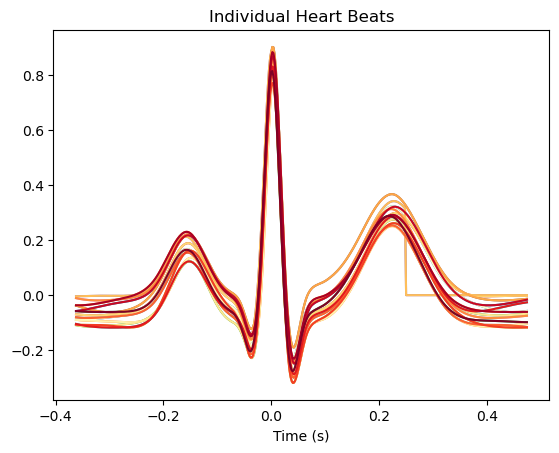

In [21]:
import neurokit2 as nk

ecg = nk.ecg_simulate(duration=10, sampling_rate=500, heart_rate=80, noise = 0.05)

qrs_epochs = nk.ecg_segment(ecg, rpeaks=None, sampling_rate=500, show=True)

In [24]:
qrs_epochs

{'1':              Signal  Index Label
 -0.362224 -0.089605    197     1
 -0.360222 -0.089737    198     1
 -0.358220 -0.089821    199     1
 -0.356218 -0.089861    200     1
 -0.354216 -0.089859    201     1
 ...             ...    ...   ...
  0.466597 -0.060101    611     1
  0.468599 -0.059516    612     1
  0.470601 -0.058865    613     1
  0.472603 -0.058149    614     1
  0.474605 -0.057370    615     1
 
 [419 rows x 3 columns],
 '2':              Signal  Index Label
 -0.362224 -0.037665    571     2
 -0.360222 -0.039008    572     2
 -0.358220 -0.040314    573     2
 -0.356218 -0.041588    574     2
 -0.354216 -0.042832    575     2
 ...             ...    ...   ...
  0.466597 -0.015078    985     2
  0.468599 -0.014692    986     2
  0.470601 -0.014281    987     2
  0.472603 -0.013843    988     2
  0.474605 -0.013375    989     2
 
 [419 rows x 3 columns],
 '3':              Signal  Index Label
 -0.362224 -0.010696    944     3
 -0.360222 -0.011595    945     3
 -0.358220 -0

In [22]:
qrs_epochs['1'].Signal.index

Float64Index([ -0.3622235927616172, -0.36022161016525783, -0.35821962756889847,
               -0.3562176449725391, -0.35421566237617974,  -0.3522136797798204,
                -0.350211697183461, -0.34820971458710165,  -0.3462077319907423,
               -0.3442057493943829,
              ...
               0.45658728914936164,  0.45858927174572095,  0.46059125434208037,
                0.4625932369384397,   0.4645952195347991,   0.4665972021311584,
                0.4685991847275178,  0.47060116732387713,  0.47260314992023655,
                 0.474605132516596],
             dtype='float64', length=419)

In [23]:
qrs_epochs['1'].Signal

-0.362224   -0.089605
-0.360222   -0.089737
-0.358220   -0.089821
-0.356218   -0.089861
-0.354216   -0.089859
               ...   
 0.466597   -0.060101
 0.468599   -0.059516
 0.470601   -0.058865
 0.472603   -0.058149
 0.474605   -0.057370
Name: Signal, Length: 419, dtype: float64

In [2]:
import neurokit2 as nk
# Simulate ECG signal
ecg = nk.ecg_simulate(duration=10, sampling_rate=1000)

# Get R-peaks location
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=1000)

# Delineate cardiac cycle
signals, waves = nk.ecg_delineate(ecg, rpeaks, sampling_rate=1000)

In [5]:
signals

,ECG_P_Peaks,ECG_P_Onsets,ECG_P_Offsets,ECG_Q_Peaks,ECG_R_Onsets,ECG_R_Offsets,ECG_S_Peaks,ECG_T_Peaks,ECG_T_Onsets,ECG_T_Offsets
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0


In [25]:
for key, value in waves.items():
    print(f"{key} has length {len(value)}")

ECG_P_Peaks has length 11
ECG_P_Onsets has length 11
ECG_P_Offsets has length 11
ECG_Q_Peaks has length 11
ECG_R_Onsets has length 11
ECG_R_Offsets has length 11
ECG_S_Peaks has length 11
ECG_T_Peaks has length 11
ECG_T_Onsets has length 11
ECG_T_Offsets has length 11


In [30]:
type(rpeaks['ECG_R_Peaks'])
print(rpeaks['ECG_R_Peaks'])

[ 857 1725 2588 3433 4278 5148 6023 6870 7704 8561 9440]


In [29]:
print(type(waves['ECG_P_Peaks']))
print(waves['ECG_P_Peaks'])

<class 'list'>
[683, 1547, 2413, 3262, 4106, 4971, 5846, 6698, 7534, 8388, 9262]


In [32]:
import numpy as np
delineation = waves
for key, value in delineation.items():
    delineation[key] = np.array(value)

In [36]:
print(type(waves['ECG_P_Peaks']))
print(waves['ECG_P_Peaks'].dtype)

<class 'numpy.ndarray'>
int64


In [20]:
signals.columns.values

array(['ECG_P_Peaks', 'ECG_P_Onsets', 'ECG_P_Offsets', 'ECG_Q_Peaks',
       'ECG_R_Onsets', 'ECG_R_Offsets', 'ECG_S_Peaks', 'ECG_T_Peaks',
       'ECG_T_Onsets', 'ECG_T_Offsets'], dtype=object)